In [1]:
import chollaread
import numpy as np
import yt
import trident
import matplotlib.pyplot as plt

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/146.h5', cell_size_cgs = 10*chollaread.kpc/256)

yt : [INFO     ] 2022-01-27 01:26:56,984 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-01-27 01:26:56,985 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-01-27 01:26:56,985 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-01-27 01:26:56,986 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-01-27 01:26:56,986 Parameters: cosmological_simulation   = 0.0


In [3]:
def spec_cell2(x0,y0,z0,x,y,z, Nx, instrument, line_list, lmin, lmax):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    
    for i in range(Nx):
        
        
        ray_start = np.array([x0+(i*cu),y0,z0])*k
        ray_end = np.array([x+(i*cu),y,z])*k

        ray = trident.make_simple_ray(ds,
                                         start_position=ray_start,
                                         end_position=ray_end,
                                         data_filename= 'ray.h5',
                                         lines='all',
                                         ftype='gas')



        sg = trident.SpectrumGenerator(instrument)
        sg.make_spectrum(ray, lines=[line_list])
        sg.save_spectrum('spec.txt')

        f = np.loadtxt('spec.txt')
        lam = f[:,0] # All rows, 1st column
        flux = f[:,2]

        tog = np.array([lam, flux])
        arrays.append(tog)
        
    
    # Sum over all cells
#     abs_ = 1 - np.array(arrays)[:,1,:]
    
#     fl_ = 1-abs_.sum(axis=0)
#     fl_[fl_<0] = 0

    
    fl_ = np.array(arrays)[:,1,:].prod(axis=0)
    
    

    ray_ = trident.make_simple_ray(ds,
                                         start_position=np.array([x0, y0, z0])*k,
                                         end_position=np.array([x0+Nx*cu,y,z])*k,
                                         data_filename= 'ray_.h5',
                                         lines='all',
                                         ftype='gas')
    
    sg2 = trident.SpectrumGenerator(instrument)
    sg2.make_spectrum(ray_, lines=[line_list])
    sg2.save_spectrum('spec2.txt')
    
    f_ = np.loadtxt('spec2.txt')
    lam_ = f_[:,0] # All rows, 1st column
    flux_ = f_[:,2]
    
    
    fig = plt.figure(figsize=(15, 5))
    
    plt.plot(arrays[0][0], flux_, color='deeppink', linewidth=3, label='1 Ray Equivalent', alpha=0.9)
           
    for p in range(Nx):

        plt.plot(arrays[0][0], arrays[p][1], alpha=0.8)

    plt.plot(arrays[0][0], fl_, color='black', label = "Cell by Cell Spectrum", linewidth=1.75, ls='--')
    
    plt.xlim(lmin, lmax)
    plt.title(line_list)
    plt.legend(fontsize='large')
    plt.xlabel('Wavelength')
    plt.ylabel('Relative Flux')

In [4]:
def projx(y_, z_):
    
    k = (3.086E+21)*10
    
    px = yt.ProjectionPlot(ds, 'x', 'density')
    px.annotate_marker((y_,z_), coord_system="plot", plot_args={"color":"black", "s": 200})
    px.show()

In [5]:
def slicep():

    sl = yt.SlicePlot(ds, "z", [("density")])
    sl.annotate_ray(ray_, arrow=True)
    sl.set_cmap(("density"), "BLUE-RED")

    sl.show()

In [6]:
def make_ray(x0, y0, z0, x, y, z):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray_.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

In [7]:
ray_ = make_ray(1.125, .65, .5, 1.125+(6/256), .65, .5)

yt : [INFO     ] 2022-01-27 01:26:57,287 Getting segment at z = 0.0: [0.5625 0.325  0.25  ] unitary to [0.57421875 0.325      0.25      ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-27 01:26:57,289 Getting subsegment: [0.5625 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [0.57421875 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-27 01:26:58,242 Saving field data to yt dataset: ray_.h5.
yt : [INFO     ] 2022-01-27 01:26:58,321 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-27 01:26:58,322 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-27 01:26:58,322 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-27 01:26:58,322 Parameters: domain_right_edge         = [

yt : [INFO     ] 2022-01-27 01:26:58,386 xlim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-01-27 01:26:58,386 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-01-27 01:26:58,387 xlim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-01-27 01:26:58,387 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-01-27 01:26:58,388 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] =


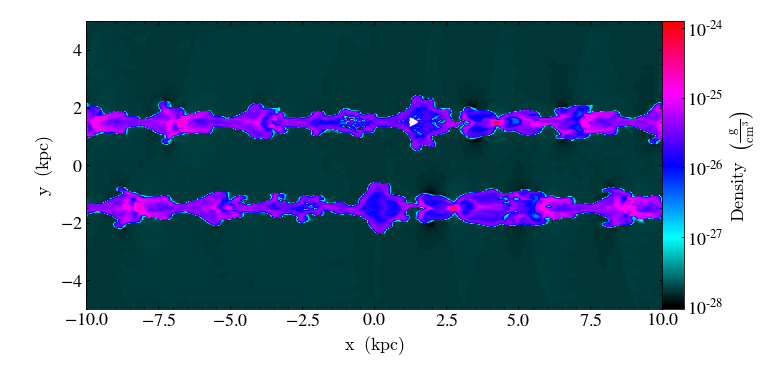

In [8]:
slicep()

yt : [INFO     ] 2022-01-27 01:28:10,505 Projection completed
yt : [INFO     ] 2022-01-27 01:28:10,506 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-01-27 01:28:10,506 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-01-27 01:28:10,506 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-01-27 01:28:10,507 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-01-27 01:28:10,507 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releas


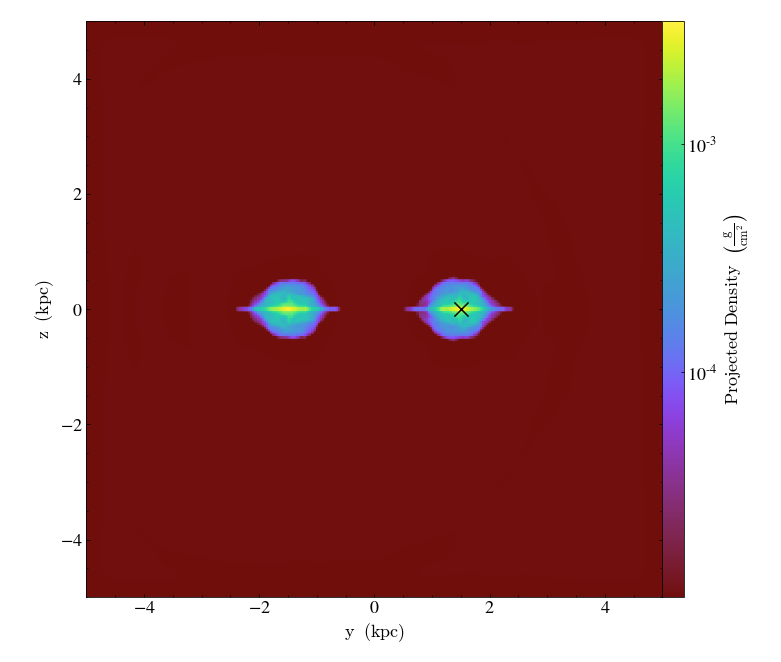

In [14]:
projx(1.5, 0)

# C IV

yt : [INFO     ] 2022-01-27 01:27:03,224 Getting segment at z = 0.0: [0.5625 0.325  0.25  ] unitary to [0.56445312 0.325      0.25      ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-27 01:27:03,226 Getting subsegment: [0.5625 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [0.564453125 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-27 01:27:03,830 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-27 01:27:03,914 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-27 01:27:03,914 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-27 01:27:03,914 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-27 01:27:03,915 Parameters: domain_right_edge         = [

yt : [INFO     ] 2022-01-27 01:27:09,755 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-27 01:27:09,755 Setting instrument to COS-G160M
yt : [INFO     ] 2022-01-27 01:27:09,766 Allocating for 1.000e+00 particles (index particle type 'all')
yt : [INFO     ] 2022-01-27 01:27:09,770 Identified 1.000e+00 octs
yt : [INFO     ] 2022-01-27 01:27:09,855 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-27 01:27:09,860 Creating spectrum
yt : [INFO     ] 2022-01-27 01:27:09,889 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-01-27 01:27:10,215 Getting segment at z = 0.0: [0.5625 0.325  0.25  ] unitary to [0.57421875 0.325      0.25      ] unitary.
yt : [INFO     ] 2022-01-27 01:27:10,216 Getting subsegment: [0.5625 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [0.57421875 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-27 01:27:10,819 Saving field data to yt dataset: ray

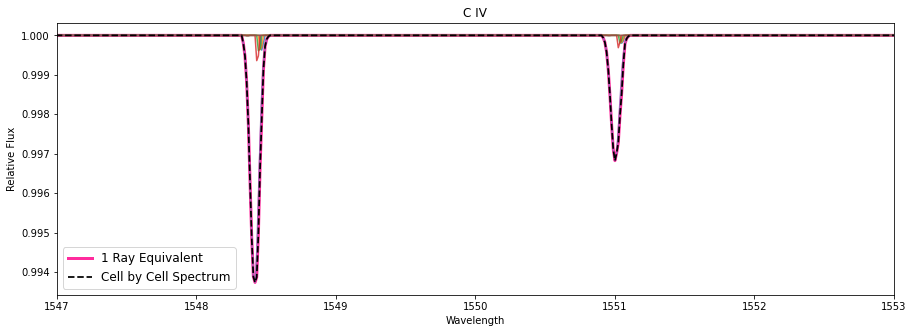

In [10]:
spec_cell2(1.125, .65, .5, 1.125+(1/256), .65, .5, 6, 'COS-G160M', 'C IV', 1547, 1553)

# O I 1302

yt : [INFO     ] 2022-01-27 01:27:11,664 Getting segment at z = 0.0: [0.5625 0.325  0.25  ] unitary to [0.56445312 0.325      0.25      ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-27 01:27:11,665 Getting subsegment: [0.5625 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [0.564453125 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-27 01:27:12,268 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-27 01:27:12,344 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-27 01:27:12,345 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-27 01:27:12,345 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-27 01:27:12,345 Parameters: domain_right_edge         = [

yt : [INFO     ] 2022-01-27 01:27:18,100 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-27 01:27:18,101 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-27 01:27:18,111 Allocating for 1.000e+00 particles (index particle type 'all')
yt : [INFO     ] 2022-01-27 01:27:18,115 Identified 1.000e+00 octs
yt : [INFO     ] 2022-01-27 01:27:18,206 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-27 01:27:18,210 Creating spectrum
yt : [INFO     ] 2022-01-27 01:27:18,235 Not adding line O I 1302: insufficient column density
yt : [INFO     ] 2022-01-27 01:27:18,236 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-01-27 01:27:18,557 Getting segment at z = 0.0: [0.5625 0.325  0.25  ] unitary to [0.57421875 0.325      0.25      ] unitary.
yt : [INFO     ] 2022-01-27 01:27:18,559 Getting subsegment: [0.5625 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [0.57421875 unitary, 0.32500000000000007 unitary, 

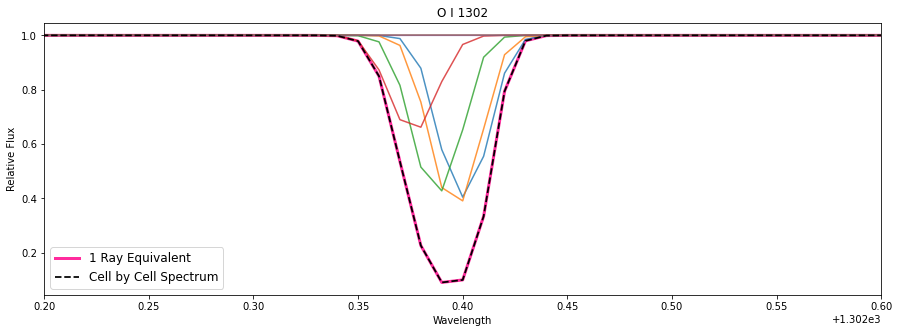

In [11]:
spec_cell2(1.125, .65, .5, 1.125+(1/256), .65, .5, 6, 'COS-G130M', 'O I 1302', 1302.2, 1302.6)

# Si II 1304

yt : [INFO     ] 2022-01-27 01:27:19,952 Getting segment at z = 0.0: [0.5625 0.325  0.25  ] unitary to [0.56445312 0.325      0.25      ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-27 01:27:19,954 Getting subsegment: [0.5625 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [0.564453125 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-27 01:27:20,547 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-27 01:27:20,625 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-27 01:27:20,625 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-27 01:27:20,625 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-27 01:27:20,626 Parameters: domain_right_edge         = [

yt : [INFO     ] 2022-01-27 01:27:26,364 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-27 01:27:26,364 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-27 01:27:26,375 Allocating for 1.000e+00 particles (index particle type 'all')
yt : [INFO     ] 2022-01-27 01:27:26,379 Identified 1.000e+00 octs
yt : [INFO     ] 2022-01-27 01:27:26,509 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-27 01:27:26,512 Creating spectrum
yt : [INFO     ] 2022-01-27 01:27:26,532 Not adding line Si II 1304: insufficient column density
yt : [INFO     ] 2022-01-27 01:27:26,532 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-01-27 01:27:26,848 Getting segment at z = 0.0: [0.5625 0.325  0.25  ] unitary to [0.57421875 0.325      0.25      ] unitary.
yt : [INFO     ] 2022-01-27 01:27:26,849 Getting subsegment: [0.5625 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [0.57421875 unitary, 0.32500000000000007 uni

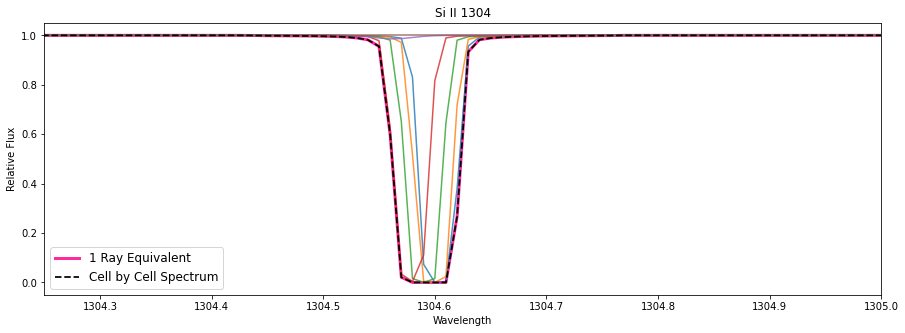

In [12]:
spec_cell2(1.125, .65, .5, 1.125+(1/256), .65, .5, 6, 'COS-G130M', 'Si II 1304', 1304.25, 1305)

# C II 1335

yt : [INFO     ] 2022-01-27 01:27:28,228 Getting segment at z = 0.0: [0.5625 0.325  0.25  ] unitary to [0.56445312 0.325      0.25      ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-27 01:27:28,229 Getting subsegment: [0.5625 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [0.564453125 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-27 01:27:28,824 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-27 01:27:28,900 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-27 01:27:28,900 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-27 01:27:28,901 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-27 01:27:28,901 Parameters: domain_right_edge         = [

yt : [INFO     ] 2022-01-27 01:27:34,633 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-27 01:27:34,634 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-27 01:27:34,646 Allocating for 1.000e+00 particles (index particle type 'all')
yt : [INFO     ] 2022-01-27 01:27:34,650 Identified 1.000e+00 octs
yt : [INFO     ] 2022-01-27 01:27:34,738 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-27 01:27:34,742 Creating spectrum
yt : [INFO     ] 2022-01-27 01:27:34,762 Not adding line C II 1335: insufficient column density
yt : [INFO     ] 2022-01-27 01:27:34,763 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-01-27 01:27:35,082 Getting segment at z = 0.0: [0.5625 0.325  0.25  ] unitary to [0.57421875 0.325      0.25      ] unitary.
yt : [INFO     ] 2022-01-27 01:27:35,083 Getting subsegment: [0.5625 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [0.57421875 unitary, 0.32500000000000007 unita

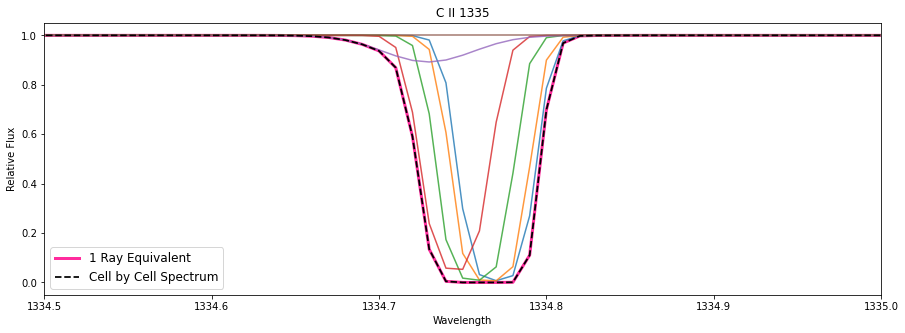

In [13]:
spec_cell2(1.125, .65, .5, 1.125+(1/256), .65, .5, 6, 'COS-G130M', 'C II 1335', 1334.5, 1335)